In [11]:
import pandas as pd

covid_data = pd.read_csv('data/covid_data.csv')
covid_data.head()

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [12]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

In [13]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

covid_data['date'] = pd.to_datetime(covid_data['date'])

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

covid_data.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
vaccinations_data.head()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [21]:
start_ncov = covid_data['date'].min()
finish_ncov = covid_data['date'].max()
print(f'Start looking: {start_ncov} | Finish looking: {finish_ncov}')
start_vaccin = vaccinations_data['date'].min()
finish_vaccin= vaccinations_data['date'].max()
print(start_vaccin, '-', finish_vaccin)

Start looking: 2020-01-22 00:00:00 | Finish looking: 2021-05-29 00:00:00
2020-12-02 00:00:00 - 2021-09-06 00:00:00


In [38]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
print(covid_df.index.value_counts().sum(), covid_df.columns.value_counts().sum())

86785 16


In [49]:
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed'] * 100
covid_df[['death_rate','recover_rate']].median()

death_rate       1.761265
recover_rate    78.513596
dtype: float64

In [50]:
death_rate_USA = round(
    covid_df[covid_df['country']=='United States']['death_rate'].max(), 2
)
death_rate_USA

7.19

In [51]:
recover_mean_RU = round(
    covid_df[covid_df['country']=='Russia']['recover_rate'].mean(), 2
)
recover_mean_RU

67.06

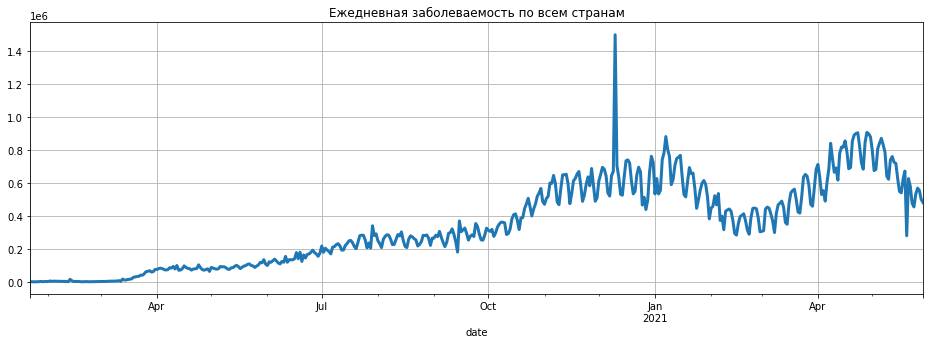

In [57]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(16, 5),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3
);

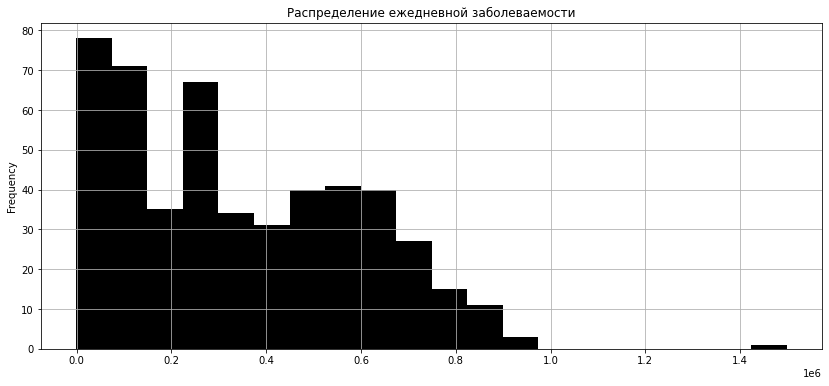

In [62]:
grouped_cases.plot(
    kind='hist',
    figsize=(14, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=20
);

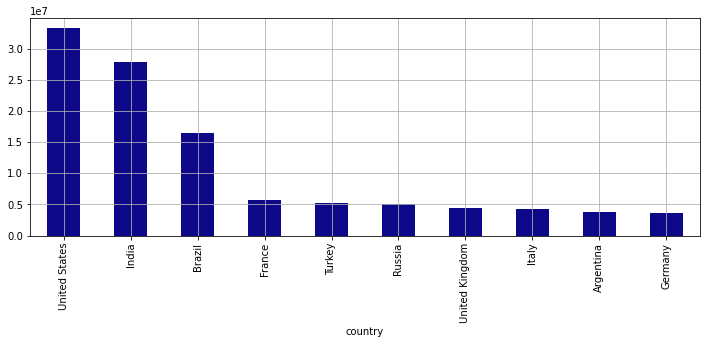

In [61]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

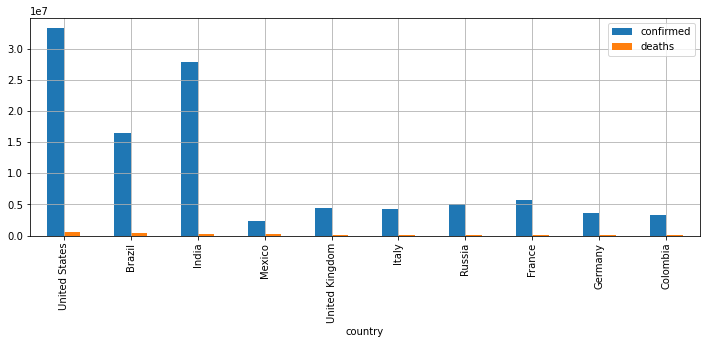

In [66]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

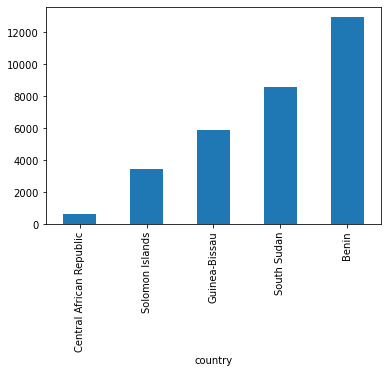

In [67]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

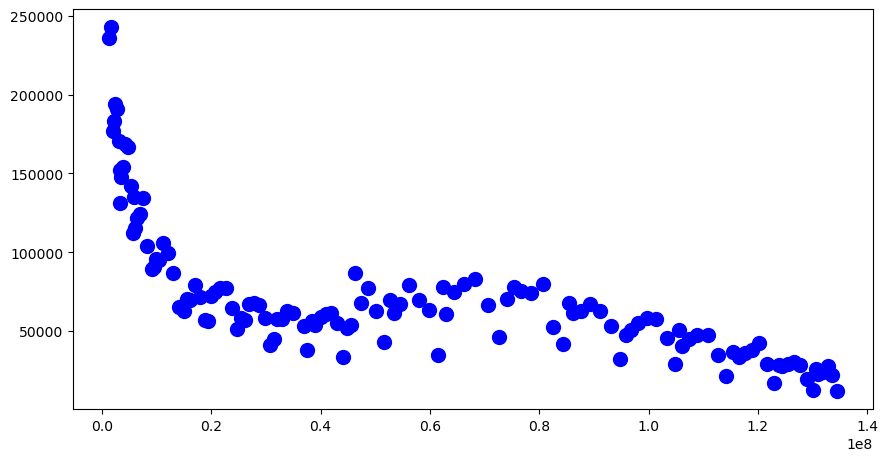

In [69]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);